# Python exploratory analysis
This is the eda example by Tuatini Godard on Kaggle using the data from housing prices: advanced regression techniques 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use('bmh')

In [4]:
fname="../python EDA/train.csv"
df=pd.read_csv(fname)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [7]:
df.groupby("MSZoning").MSZoning.count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64

In [8]:
df.MSZoning.dtype

dtype('O')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as Alley and PoolQC). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove Id and the features with 30% or less NaN values.

In [10]:
#df.count() does not include NaN values 
df2=df[[column for column in df if df[column].count()/len(df)>=0.3]]
del df2['Id']
print("List of dropped columns:", end =" ")
for c in df.columns:
    if c not in df2.columns:
        print(c,end=", ")
print('\n')


List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



In [11]:
len(df)

1460

Note: If we take the features we just removed and look at their description in the `data_description.txt` file we can deduct that these features may not be present on all houses (which explains the `NaN` values). In our next Data preparation/cleaning notebook we could tranform them into categorical dummy values.

In [12]:
df=df2

In [13]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
print(df["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


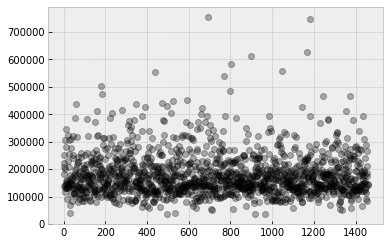

In [15]:
#Looking at the distribution of the housing price 
import numpy as np
x=np.arange(len(df))
y=df["SalePrice"]
plt.plot(x,y,"ko",alpha=.3)

Text(0.5,0,'MSZoning')

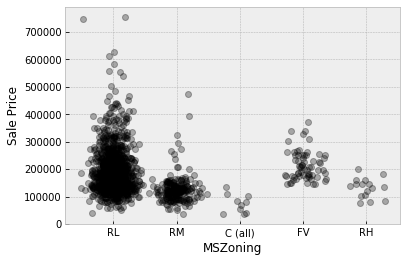

In [16]:
#Jitter by the MSZoning 
x_pos=np.arange(len(df["MSZoning"].unique()))
x_labels=df["MSZoning"].unique()
for i in range(len(x_pos)):
    y=df[df.MSZoning==x_labels[i]].SalePrice
    x=np.random.normal(x_pos[i],0.156,len(y))
    plt.plot(x,y,'ko',alpha=0.3)
plt.xticks(x_pos,x_labels)
plt.ylabel("Sale Price")
plt.xlabel("MSZoning")

In [17]:
df.groupby("MSZoning").MSZoning.count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64

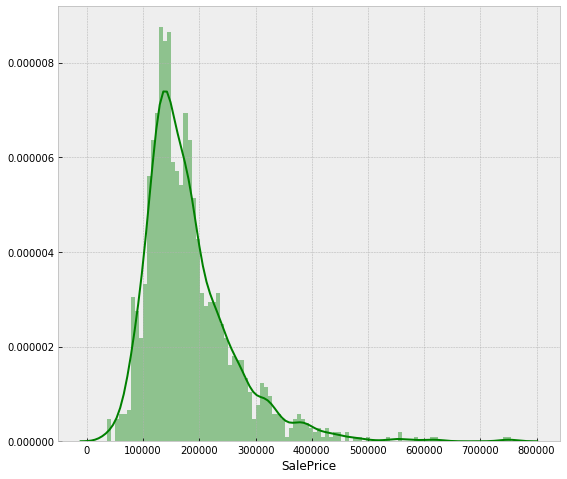

In [18]:
plt.figure(figsize=(9,8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

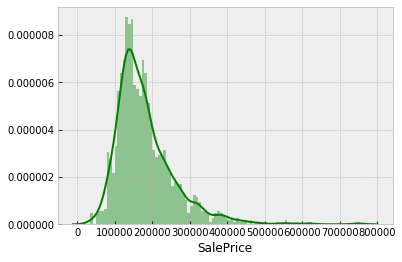

In [19]:
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

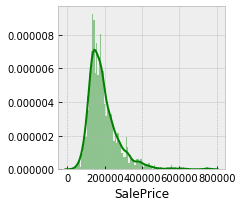

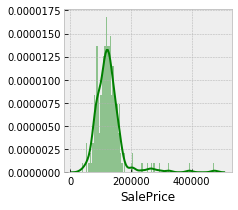

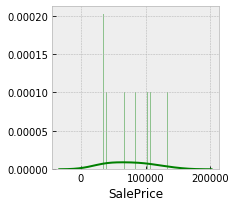

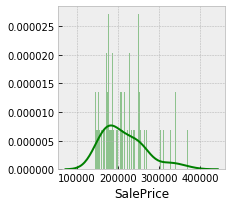

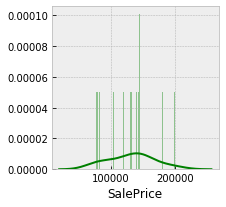

In [20]:
#Create the distribution plot of seaborn of different distributions by Zoning standards
#Plot 1
x_labels=df["MSZoning"].unique()
for e in x_labels:
    plt.figure(figsize=(3,3))
    sns.distplot(df[df["MSZoning"]==e].SalePrice,color='g',bins=100,hist_kws={"alpha":0.4});

With this information we can see that the prices are skewed right and some outliers lies above ~500,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`SalePrice`) for machine learning.

# Numerical Data Distribution
Looking at the distribution of all features 
Looking on only hte numerica ldata

In [21]:
df.dtypes.tolist()[:3]

[dtype('int64'), dtype('O'), dtype('float64')]

In [22]:
#Applying the set operator to get rid of the redundencies 

In [23]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [24]:
#Use this operation to slice the dataset into numeric only data set 
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [25]:
#size of the/shape of the Pandas data frame
df.shape

(1460, 76)

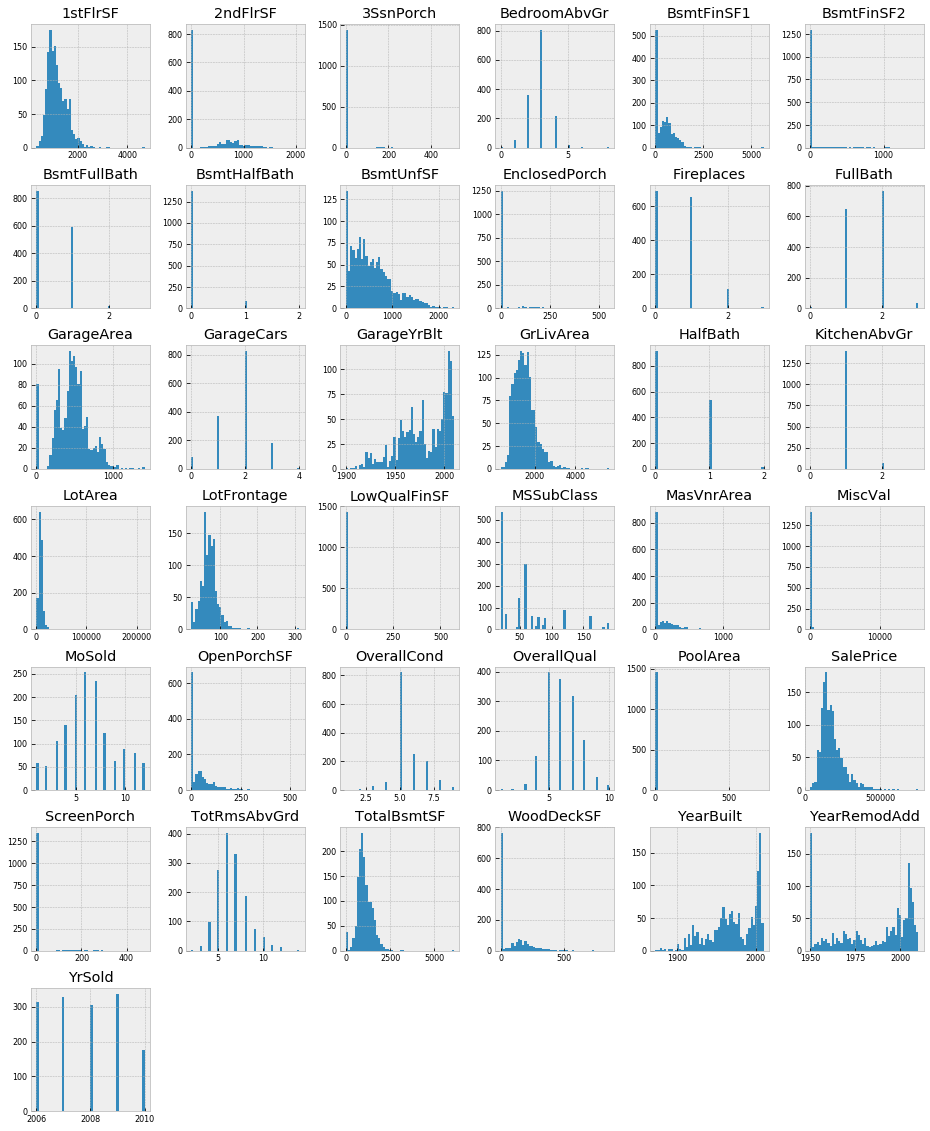

In [26]:
# Plotting all the distribution data
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8); 
#avoid the verbosity of matplotlib information

#### Correlation
Looking at features that are strongly correlated with SalePrice. Store these variables in a variable called golden features list. Resuing the df_num to do this

In [27]:
df_num_corr=df_num.corr()['SalePrice'][:-1]#Use the column in the bracket to 
#Specify the columns that are correlating with it (Removing the last row)

In [28]:
df_num_corr

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [29]:
golden_features_list=df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)

In [30]:
print(golden_features_list)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Text(0,0.5,'Sale Price')

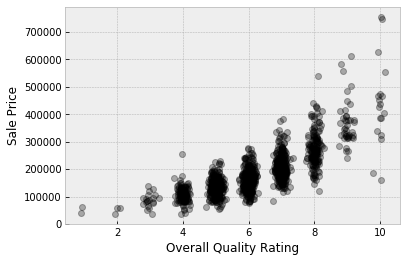

In [31]:
x_pos=[np.random.normal(x,0.1) for x in df.OverallQual]
plt.plot(x_pos,df.SalePrice,'ko',alpha=0.3)
plt.xlabel("Overall Quality Rating")
plt.ylabel("Sale Price")

In [32]:
#Fancy formating to print 
print("There is {} strongly correlated values with SalePrice: \n{}".format(len(golden_features_list),
                                                                          golden_features_list))

There is 10 strongly correlated values with SalePrice: 
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


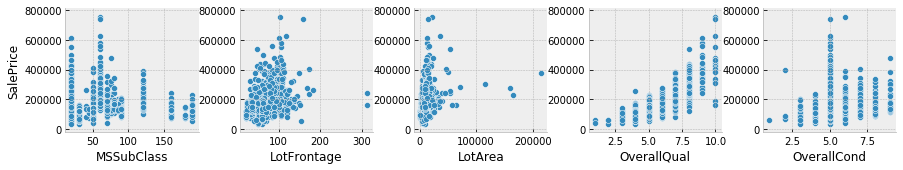

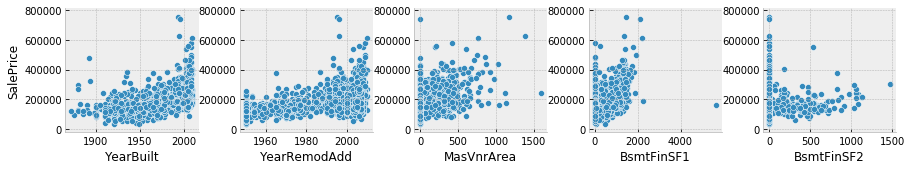

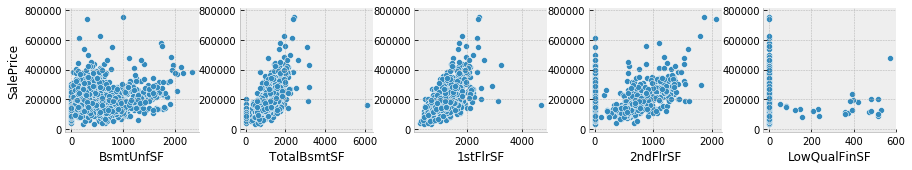

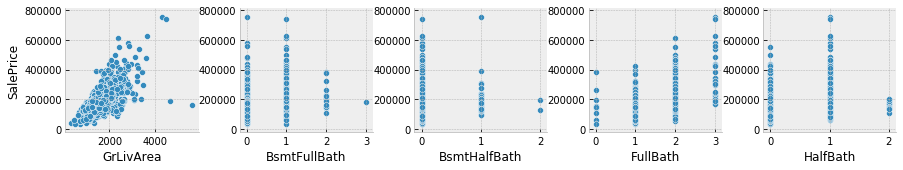

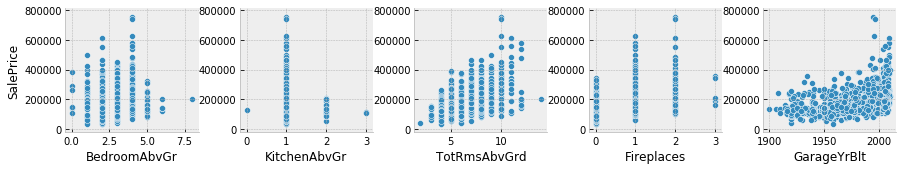

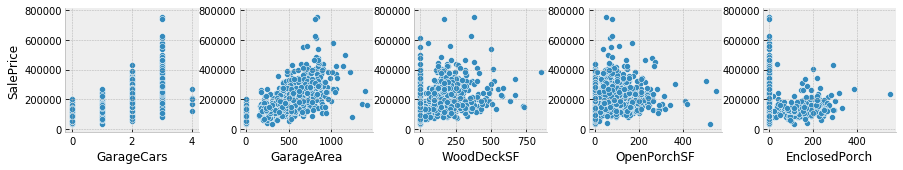

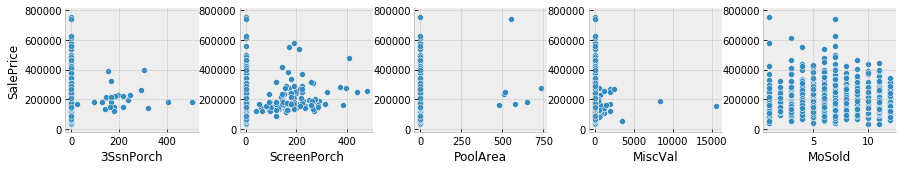

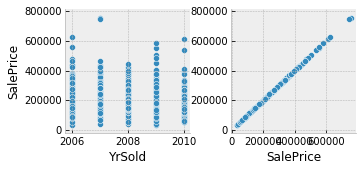

In [33]:
for i in range(0,len(df_num.columns),5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                 y_vars=['SalePrice'])

In [39]:
df_num.iloc[:,1:3].head()

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260


In [41]:
df_num.columns[1:3] #This returns an index object 

Index(['LotFrontage', 'LotArea'], dtype='object')

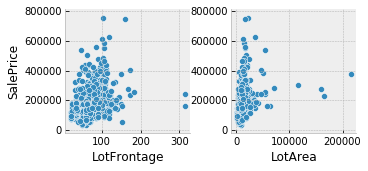

In [36]:
sns.pairplot(data=df_num,
             x_vars=df_num.columns[1:3], #using iloc doesn't work here
             y_vars=['SalePrice'])

We can clearly identify some relationships. Most of them seems to have a linear relationship with the SalePrice and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.

So now lets remove these 0 values and repeat the process of finding correlated values:

In [42]:
import operator 
individual_features_df=[]

In [49]:
df_num[df_num.columns[3]][:10] #This returns a list object 

0    7
1    6
2    7
3    7
4    8
5    5
6    8
7    7
8    7
9    5
Name: OverallQual, dtype: int64

In [50]:
df_num[[df_num.columns[3]]].head(10) #Notice how this is different from above
#This returns a Pandas Data Frame 

,OverallQual
0,7
1,6
2,7
3,7
4,8
5,5
6,8
7,7
8,7
9,5


In [51]:
df_num[[df_num.columns[3], 'SalePrice']].head()

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000


In [59]:
for i in range(0,len(df_num.columns)-1): #-1 because of the last column is SalePrice
    tmpDf=df_num[[df_num.columns[i],'SalePrice']]
    tmpDf=tmpDf[tmpDf[df_num.columns[i]] != 0] #Dropping columns equal to zero
    individual_features_df.append(tmpDf)

In [62]:
all_correlations={feature.columns[0]:feature.corr()['SalePrice'][0] for feature in individual_features_df}

In [67]:
all_correlations=sorted(all_correlations.items(), key=operator.itemgetter(1))
#I don't know what itemgetter


AttributeError: 'list' object has no attribute 'items'

In [69]:
for (key,value) in all_correlations:
    print("{:>15}:{:>15}".format(key,value))

   KitchenAbvGr:-0.13920069217785566
       HalfBath:-0.08439171127179887
     MSSubClass:-0.08428413512659523
    OverallCond:-0.0778558940486776
         YrSold:-0.028922585168730426
   BsmtHalfBath:-0.028834567185481712
       PoolArea:-0.014091521506356928
   BsmtFullBath:0.011439163340408634
         MoSold:0.04643224522381936
      3SsnPorch:0.06393243256889079
    OpenPorchSF:0.08645298857147708
        MiscVal:0.08896338917298924
     Fireplaces:0.1216605842136395
      BsmtUnfSF:0.16926100049514192
   BedroomAbvGr:0.18093669310849045
     WoodDeckSF:0.19370601237520677
     BsmtFinSF2:0.19895609430836586
  EnclosedPorch:0.2412788363011751
    ScreenPorch:0.25543007954878405
        LotArea:0.2638433538714063
   LowQualFinSF:0.3000750165550133
    LotFrontage:0.35179909657067854
     MasVnrArea:0.4340902197568926
     BsmtFinSF1:0.4716904265235731
    GarageYrBlt:0.48636167748786213
   YearRemodAdd:0.5071009671113867
      YearBuilt:0.5228973328794967
   TotRmsAbvGrd:0.53372315

In [78]:
test=pd.DataFrame(all_correlations)
test.columns=["Variables","Correlation"]
test

,Variables,Correlation
0,KitchenAbvGr,-0.139201
1,HalfBath,-0.084392
2,MSSubClass,-0.084284
3,OverallCond,-0.077856
4,YrSold,-0.028923
5,BsmtHalfBath,-0.028835
6,PoolArea,-0.014092
7,BsmtFullBath,0.011439
8,MoSold,0.046432
9,3SsnPorch,0.063932


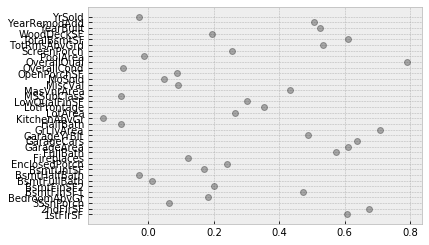

In [79]:
plt.plot(test.Correlation,test.Variables,'ko',alpha=0.3)

In [87]:
golden_features_list=[key for key, value in all_correlations if abs(value)>=0.5]


In [88]:
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list),
                                                                         golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


In [91]:
{key:value for key,value in all_correlations if abs(value)>=0.5}

{'1stFlrSF': 0.6058521846919166,
 '2ndFlrSF': 0.67330483245683825,
 'FullBath': 0.57456267377608161,
 'GarageArea': 0.60840528291683427,
 'GarageCars': 0.63709540620789529,
 'GrLivArea': 0.70862447761265113,
 'OverallQual': 0.79098160058380473,
 'TotRmsAbvGrd': 0.53372315558202377,
 'TotalBsmtSF': 0.60968081880743663,
 'YearBuilt': 0.52289733287949669,
 'YearRemodAdd': 0.50710096711138675}

We found strongly correlated predictors with `SalePrice`. Later with feature engineering we may add dummy values where value of a given feature > 0 would be 1 (precense of such feature) and 0 would be 0. 
For `2ndFlrSF` for example, we could create a dummy value for its precense or non-precense and finally sum it up to `1stFlrSF`.

### Conclusion

By looking at correlation between numerical values we discovered 11 features which have a strong relationship to a house price. Besides correlation we didn't find any notable pattern on the datas which are not correlated.

Some values such as GarageCars -> SalePrice or Fireplaces -> SalePrice shows a particular pattern with verticals lines roughly meaning that they are discrete variables with a short range but I don't know if they need some sort of "special treatment".

### Feature to feature relationship (Excl. Features to SalePrice relationship)
Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

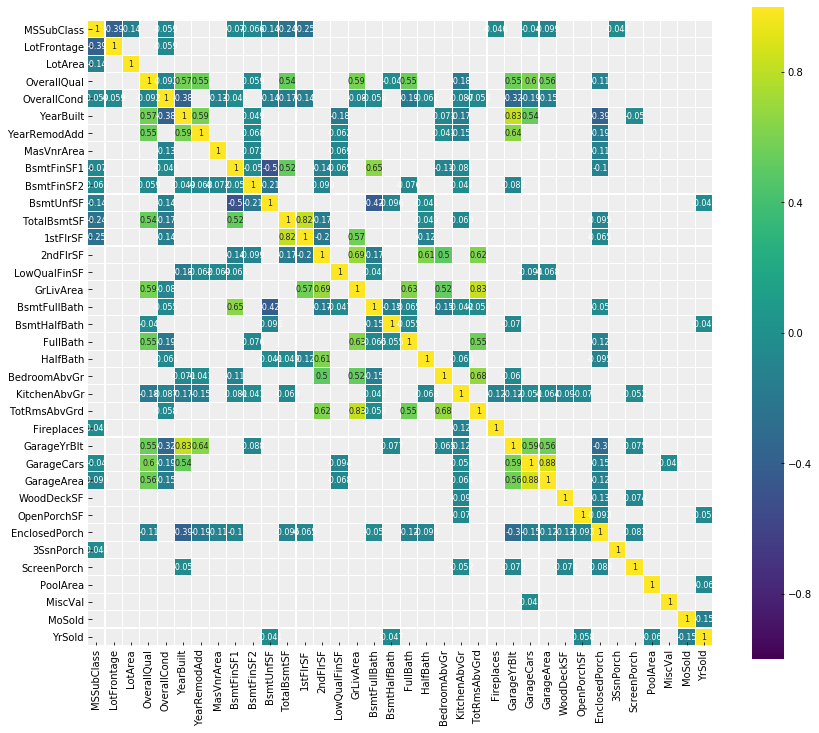

In [98]:
corr=df_num.drop("SalePrice",axis=1).corr() #We already examined SalePrice Correlations
plt.figure(figsize=(14,12))

sns.heatmap(corr[(corr>=0.5)|(corr<=-.04)],
           cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,
           annot=True,annot_kws={"size":8},square=True)

A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

There is a strong negative correlation between BsmtUnfSF (Unfinished square feet of basement area) and BsmtFinSF2 (Type 2 finished square feet). There is a definition of unfinished square feet here but as for a house of "Type 2", I can't tell what it really is.
HalfBath/2ndFlrSF is interesting and may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom (I'll consider that when I'll buy myself a house uh...)
There is of course a lot more to discover but I can't really explain the rest of the features except the most obvious ones.

We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) and others indicates that people expect multiples features to be packaged together.

# Q2Q (Quantitative to Quantitative relationship)
Some of the features of our dataset are categorical. To separate the categorical from quantitative features lets refer ourselves to the data_description.txt file. According to this file we end up with the folowing columns:

In [99]:
quantitative_features_list=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [100]:
df_quantitative_values=df[quantitative_features_list] #use a list to slice

In [101]:
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


Still, we have a lot of features to analyse here so let's take the strongly correlated quantitative features from this dataset and analyse them one by one

In [104]:
features_to_analyse=[x for x in quantitative_features_list if x in golden_features_list]

In [105]:
features_to_analyse.append("SalePrice")
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [107]:
enumerate(fig.axes)

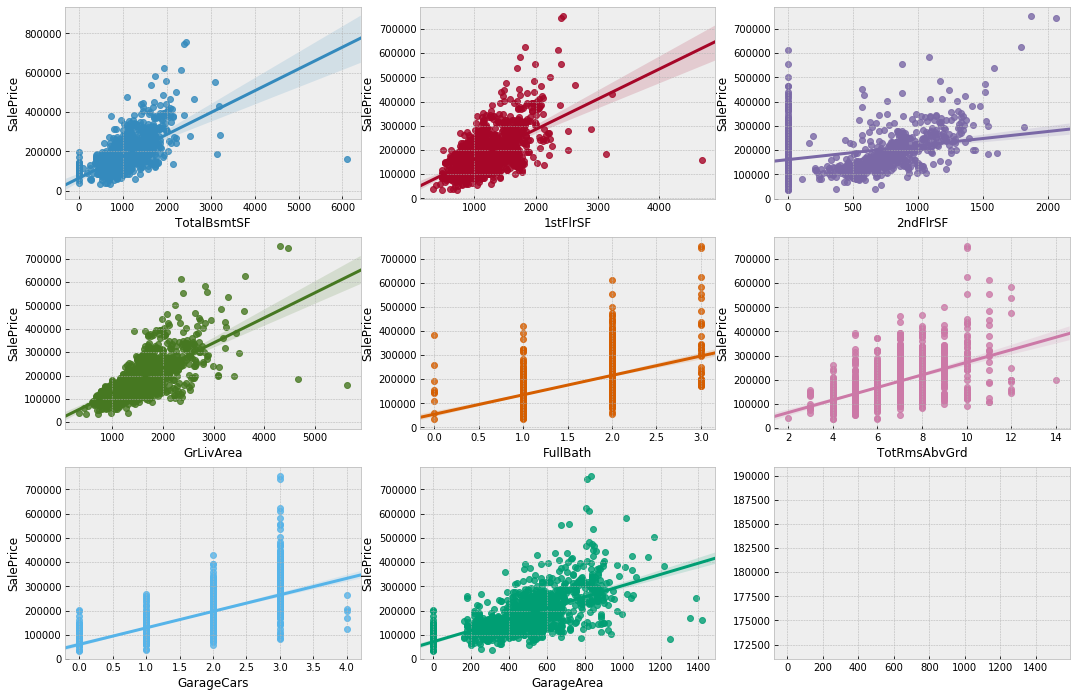

In [106]:
#Looking at the distribution

fig,ax=plt.subplots(round(len(features_to_analyse)/3),3,figsize=(18,12))
for i,ax in enumerate(fig.axes):
    if i<len(features_to_analyse)-1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice',data=df[features_to_analyse],ax=ax)

# C2Q (Categorical to quantitative relationship)

Let's get all the categorical features of the dataset and see if we can find any insight in them. We can remove quantitative_features_list from the dataframe

In [110]:
categorical_features=[a for a in quantitative_features_list[:-1]+
                      df.columns.tolist() if (a not in quantitative_features_list[:-1]) 
                      or (a not in df.columns.tolist())]

In [111]:
df_categ=df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000
